# Risk Analysis of an equally weighted portfolio by the three methods of VaR

## Introduction
This report shows my practice to calculate VaR of 5 securities as below via yfinance module.
- SPY: SPDR S&P 500 ETF Trust
- BND: Vanguard Total Bond Market ETF
- GLD: SPDR Gold Shares
- QQQ: Invesco QQQ Trust
- VTI; Vanguard Total Stock Market ETF


## Histrical Method
Import necessary libraries

In [84]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

Set time from to a certain number of years

In [85]:
years = 10

endDate = dt.datetime.now()
startDate = endDate -dt.timedelta(days = 365*years)

### Create a list of tickers

In [86]:
tickers = ['SPY', 'BND','GLD','QQQ', 'VTI']

### Download the daily for tickers
We utilise the adjusted closed prices since they account for dividends stock splits

In [87]:
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate)
    adj_close_df[ticker] = data['Adj Close']
    
print(adj_close_df)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2014-11-21  173.271179  62.603676  115.389999   95.923409   89.363525
2014-11-24  173.757385  62.611248  115.110001   96.671417   89.691147
2014-11-25  173.631638  62.725147  115.379997   96.819168   89.674339
2014-11-26  174.076019  62.816269  115.160004   97.447151   89.875984
2014-11-28  173.707123  62.922573  112.110001   97.899666   89.556740
...                ...        ...         ...         ...         ...
2024-11-11  598.760010  72.949997  242.139999  513.840027  297.540009
2024-11-12  596.900024  72.510002  240.050003  512.909973  296.369995
2024-11-13  597.190002  72.480003  237.630005  512.250000  296.230011
2024-11-14  593.349976  72.459999  237.009995  508.690002  294.040009
2024-11-15  585.750000  72.480003  236.589996  496.570007  290.309998

[2513 rows x 5 columns]


### Calculate the daily log returns

In [88]:
log_returns = np.log(adj_close_df/adj_close_df.shift(1)) # .shift(1) means the stock price of the previous date
log_return = log_returns.dropna() # Remove NAs

print(log_returns)


                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2014-11-21       NaN       NaN       NaN       NaN       NaN
2014-11-24  0.002802  0.000121 -0.002429  0.007768  0.003659
2014-11-25 -0.000724  0.001817  0.002343  0.001527 -0.000187
2014-11-26  0.002556  0.001452 -0.001909  0.006465  0.002246
2014-11-28 -0.002121  0.001691 -0.026842  0.004633 -0.003558
...              ...       ...       ...       ...       ...
2024-11-11  0.000952 -0.001917 -0.023751 -0.000584  0.002793
2024-11-12 -0.003111 -0.006050 -0.008669 -0.001812 -0.003940
2024-11-13  0.000486 -0.000414 -0.010132 -0.001288 -0.000472
2024-11-14 -0.006451 -0.000276 -0.002613 -0.006974 -0.007420
2024-11-15 -0.012891  0.000276 -0.001774 -0.024114 -0.012767

[2513 rows x 5 columns]


### Create an equally weighted portfolio
In this case we have 5 securities, therefore, the weight of each security would be 20%

In [89]:
portfolio_value = 1000000 # assume we have USD 1 million 
weights = np.array([1/len(tickers)]*len(tickers))

print(weights)

[0.2 0.2 0.2 0.2 0.2]


### Calculate the historical portofolio returns

In [90]:
historical_returns = (log_returns * weights).sum(axis=1)
print(historical_returns)

Date
2014-11-21    0.000000
2014-11-24    0.002384
2014-11-25    0.000955
2014-11-26    0.002162
2014-11-28   -0.005240
                ...   
2024-11-11   -0.004501
2024-11-12   -0.004716
2024-11-13   -0.002364
2024-11-14   -0.004747
2024-11-15   -0.010254
Length: 2513, dtype: float64


### Find the X-day historical returns
X-day refers to any number of dates we can specify to the cumulative return.

In [91]:
days = 5 # in this case we calculate the cumulative return over each 5-day window.

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2014-11-28    0.000262
2014-12-01    0.002414
2014-12-02    0.000441
2014-12-03    0.003526
2014-12-04    0.000368
                ...   
2024-11-11    0.023664
2024-11-12    0.010539
2024-11-13    0.000207
2024-11-14   -0.015273
2024-11-15   -0.026582
Length: 2509, dtype: float64


## Specify a confidence interval and calculate the Value at Risk (VaR) using historical method.

In [92]:
confidence_interval = 0.95 # 95%

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

23935.722876458985


## Plot the reuslts of the histrorical returns      

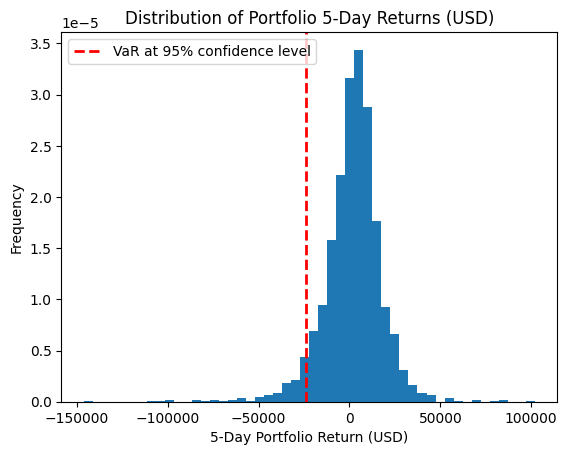

In [93]:
return_window = days
range_returns = historical_returns.rolling(window = return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value 

plt.hist(range_returns_dollar.dropna(), bins=50, density = True)
plt.xlabel(f'{return_window}-Day Portfolio Return (USD)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (USD)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()


## Parametric Method
we utilise the same codes till find the X-day

### Create a covariance matrix for all the securities

In [94]:
cov_matrix = log_returns.cov() * 252 # 252 trading days a year


### Caluculate the portfolio standard deviation

In [95]:
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

### Set different confidence levels to visualise

In [96]:
confidence_levels = [0.9, 0.95, 0.99] # 90%, 95%, 99%

### Calculate VaR at different confidence levels

In [97]:
from scipy.stats import norm # 

VaRs = []  # create an empty list to store Value at Risk

for cl in confidence_levels:
    VaR = portfolio_value * portfolio_std_dev * norm.ppf(cl) * np.sqrt(days/252)
    VaRs.append(VaR)

### Print out the VaR results

In [98]:
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)

# print each confidence level and its corresponding VaR value
for cl, VaR in zip(confidence_levels, VaRs):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $ 21,770.32
    95%:          $ 27,941.91
    99%:          $ 39,518.77


## Plot the reuslts of the portfolio returns      

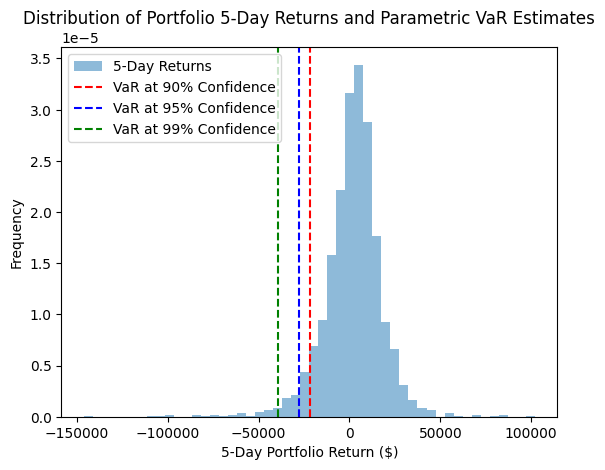

In [99]:
# Convert returns to dollar value for the histogram
historical_x_day_return = range_returns * portfolio_value

# Plot the histogram
plt.hist(historical_x_day_return, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Define the color of axvline
colors = ['r', 'b', 'g'] 

# Add vertical lines representing VaRat each confidence level
for cl, VaR, color in zip(confidence_levels, VaRs, colors):
    plt.axvline(x=-VaR, linestyle='--', color=color, label=f'VaR at {int(cl * 100)}% Confidence')

# Settings of the graph
plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()

## Monte Carlo Method

### Create a function that will be used to calculate portfolio expected return
We are assuming that future returns are based on past returns, which is not a reliable assumption.

In [100]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

### Create a function that will be used to calculate portfolio standard deviation

In [101]:
def standard_deviation (weights, cov_matrix):
    variance = weights. T @ cov_matrix @ weights
    return np.sqrt(variance)

### Create a covariance matrix for all the securities


In [102]:
cov_matrix = log_returns.cov()
print(cov_matrix)

          SPY       BND       GLD       QQQ       VTI
SPY  0.000124  0.000004  0.000004  0.000143  0.000126
BND  0.000004  0.000012  0.000011  0.000005  0.000004
GLD  0.000004  0.000011  0.000080  0.000006  0.000005
QQQ  0.000143  0.000005  0.000006  0.000190  0.000145
VTI  0.000126  0.000004  0.000005  0.000145  0.000129


### Calculate the portfolio expected return and standarddeviation

In [103]:
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation(weights, cov_matrix)

print(f'Expected Portfolio Return: {portfolio_expected_return}')
print(f'Portfolio Standard Deviation: {portfolio_std_dev}')


Expected Portfolio Return: 0.0003905210211885186
Portfolio Standard Deviation: 0.0075970290438542734


### Create a function that gives a random Z-score based on normal distribution

In [104]:
def random_z_score():
    return np.random.normal(0,1)

### Create a function to calculate scenarioGainLoss

In [105]:
days = 5

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

### Run 10,000 simulations

In [106]:
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

### Specify a confidence interval and calculate the Value at Risk

In [107]:
confidence_interval = 0.95
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

25621.429726680126


### plot the results of 10,000 scenarios

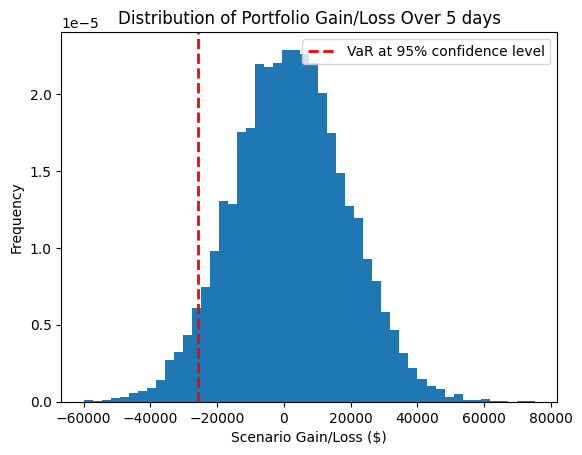

In [108]:
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} days')
plt.axvline(-VaR, color='r', linestyle="dashed", linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()